In [2]:
import pandas as pd
import numpy as np

In [3]:
features = pd.read_csv('./../data/temps.csv')
features.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [4]:
features.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [21]:
from datetime import datetime as dt

days = features.day
months = features.month
years = features.year

dates = [dt(year=int(year), month=int(month), day=int(day))
         for year, day, month in zip(years, days, months)]

dates

[datetime.datetime(2016, 1, 1, 0, 0),
 datetime.datetime(2016, 1, 2, 0, 0),
 datetime.datetime(2016, 1, 3, 0, 0),
 datetime.datetime(2016, 1, 4, 0, 0),
 datetime.datetime(2016, 1, 5, 0, 0),
 datetime.datetime(2016, 1, 6, 0, 0),
 datetime.datetime(2016, 1, 7, 0, 0),
 datetime.datetime(2016, 1, 8, 0, 0),
 datetime.datetime(2016, 1, 9, 0, 0),
 datetime.datetime(2016, 1, 10, 0, 0),
 datetime.datetime(2016, 1, 11, 0, 0),
 datetime.datetime(2016, 1, 12, 0, 0),
 datetime.datetime(2016, 1, 13, 0, 0),
 datetime.datetime(2016, 1, 14, 0, 0),
 datetime.datetime(2016, 1, 15, 0, 0),
 datetime.datetime(2016, 1, 16, 0, 0),
 datetime.datetime(2016, 1, 17, 0, 0),
 datetime.datetime(2016, 1, 18, 0, 0),
 datetime.datetime(2016, 1, 19, 0, 0),
 datetime.datetime(2016, 1, 20, 0, 0),
 datetime.datetime(2016, 1, 21, 0, 0),
 datetime.datetime(2016, 1, 22, 0, 0),
 datetime.datetime(2016, 1, 23, 0, 0),
 datetime.datetime(2016, 1, 24, 0, 0),
 datetime.datetime(2016, 1, 25, 0, 0),
 datetime.datetime(2016, 1, 26, 0,

In [22]:
import matplotlib.pyplot as plt

%matplotlib inline

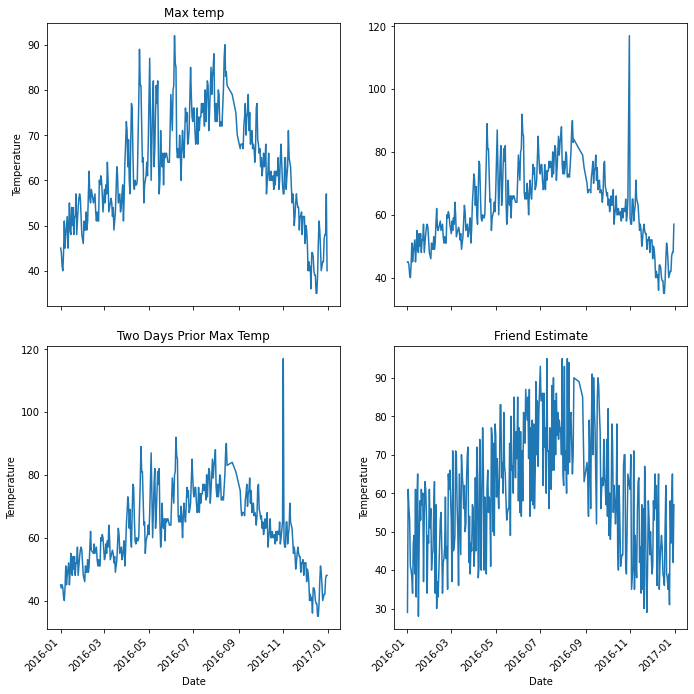

In [25]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
fig.autofmt_xdate(rotation=45)

ax1.plot(dates, features['actual'])
ax1.set_xlabel(''); ax1.set_ylabel('Temperature'); ax1.set_title('Max temp')

ax2.plot(dates, features['temp_1'])
ax2.set_xlabel(''); ax1.set_ylabel('Temperature'); ax1.set_title('Max temp')

# Temperature from 2 days ago
ax3.plot(dates, features['temp_2'])
ax3.set_xlabel('Date'); ax3.set_ylabel('Temperature'); ax3.set_title('Two Days Prior Max Temp')

# Friend Estimate
ax4.plot(dates, features['friend'])
ax4.set_xlabel('Date'); ax4.set_ylabel('Temperature'); ax4.set_title('Friend Estimate')

plt.tight_layout(pad=2)

In [28]:
features = pd.get_dummies(features)
features.head()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0


In [29]:
import numpy as np

labels = features['actual']
features.drop('actual', axis=1, inplace=True)

feature_names = list(features.columns)
features = np.array(features)

In [30]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(features, labels)

In [33]:
from sklearn.metrics import mean_squared_error as mse

baseline_preds = X_test[:, 5]
baseline_error = mse(baseline_preds, y_test)
baseline_error

35.49586206896552

In [59]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=90, random_state=42, max_depth=3)

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=90, random_state=42)

In [60]:
mse(rf.predict(X_test), y_test)

15.073247115507007

In [52]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(rf, [
    { 'max_depth': range(1, 5, 1) }
], verbose=10, n_jobs=-1)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  20 | elapsed:    2.0s remaining:   11.5s
[Parallel(n_jobs=-1)]: Done   6 out of  20 | elapsed:    2.2s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done   9 out of  20 | elapsed:    2.4s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed:    2.5s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed:    4.0s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed:    4.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    4.2s finished


GridSearchCV(estimator=RandomForestRegressor(n_estimators=1000,
                                             random_state=42),
             n_jobs=-1, param_grid=[{'max_depth': range(1, 5)}], verbose=10)

In [53]:
grid.best_params_

{'max_depth': 3}

In [62]:
100 - (100 * (abs(rf.predict(X_test) - y_test) / y_test)).mean()

94.98529785421835

In [68]:
list(sorted(zip(feature_names, rf.feature_importances_), key=lambda x: x[1], reverse=True))

[('temp_1', 0.586186194829989),
 ('average', 0.25787658763631294),
 ('forecast_acc', 0.09037673729182616),
 ('forecast_noaa', 0.03930347418869161),
 ('friend', 0.008627540444735094),
 ('month', 0.006038597590612159),
 ('temp_2', 0.0058214371648861105),
 ('forecast_under', 0.003807297250135375),
 ('day', 0.0008608776676553403),
 ('week_Fri', 0.0006495093723381215),
 ('week_Tues', 0.00020425285546081626),
 ('week_Mon', 0.00013883656985519483),
 ('week_Sun', 7.57381333050424e-05),
 ('week_Sat', 3.2919004196984693e-05),
 ('year', 0.0),
 ('week_Thurs', 0.0),
 ('week_Wed', 0.0)]